In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import improutils
import cv2

from skimage import io
from skimage import data


from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

## Example 1 
- using `interactive`
- saving retunr value for later use

In [2]:
def select_image(image_path):
    def get_image(name):
        caller = getattr(data, name)
        image = caller()
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    
    image = get_image(image_path)
    channels = 'bgr' if len(image.shape) == 3 else 'mono'
    improutils.plot_images(image, channels=channels)
    return image
        


image_name_list = ['astronaut',
                  'binary_blobs', # TODO: not working?
                  'brick',
                  'colorwheel',
                  'camera',
                  'checkerboard',
                  'clock',
                  'coffee',
                  'coins',
                  'grass',
                  'gravel',
                  'horse',
                  'logo',
                  'page',
                  'text',
                  'rocket']


In [3]:
select_widget = interactive(select_image, image_path=image_name_list)
display(select_widget)

interactive(children=(Dropdown(description='image_path', options=('astronaut', 'binary_blobs', 'brick', 'color…

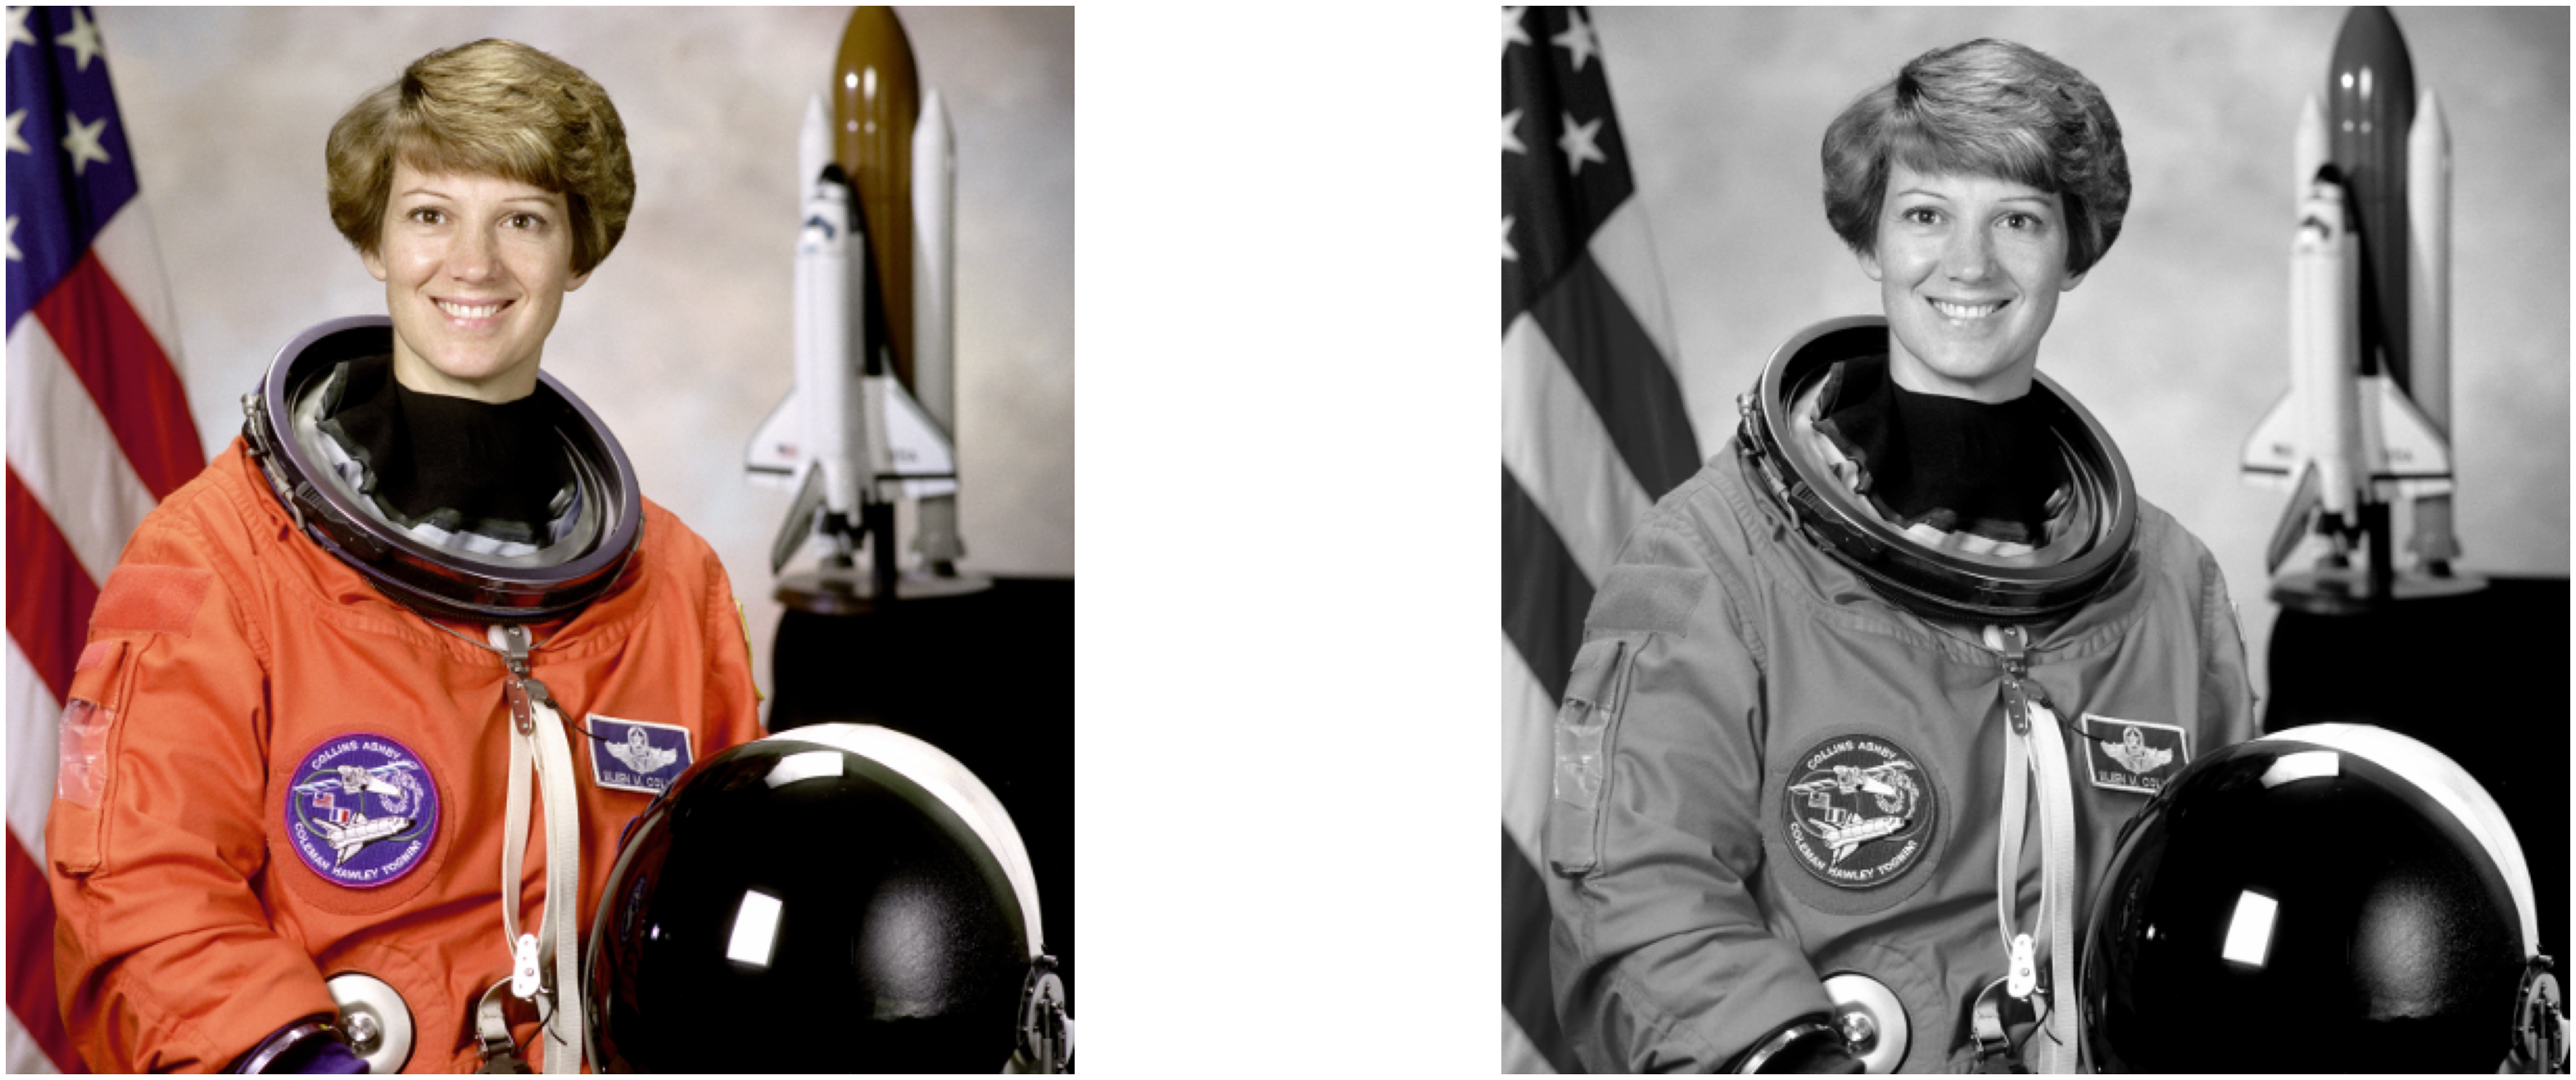

In [4]:
selected_image = select_widget.result
selected_image_gray = improutils.to_gray(select_widget.result)
improutils.plot_images(selected_image, selected_image_gray)

## Example 2
- using `interact` as decorator
- slightly shorter code

In [5]:
def channel_slider(min, max, description):
    return widgets.IntRangeSlider( min=min, max=max, step=1,value=[min,max], 
                                   description=description.ljust(30,'\xa0'), 
                                   continuous_update=False, 
                                   orientation='horizontal',
                                   style=dict(description_width='initial'),
                                   layout=widgets.Layout(width='auto', grid_area='header'),
                                  )
def threshold(img, l_bound, u_bound):
    #return img[(img>=l_bound) & (img <= u_bound)] * 255
    return np.logical_and(img > l_bound, img < u_bound).astype(np.uint8) * 255

In [6]:
@interact(threshold_range = channel_slider( min=0, max=255, description='Threshold range:',))
def _(threshold_range):
    mask = threshold(selected_image_gray, threshold_range[0], threshold_range[1])
    improutils.plot_images(mask, improutils.apply_mask(selected_image, mask))

interactive(children=(IntRangeSlider(value=(0, 255), continuous_update=False, description='Threshold range:\xa…